# Import Library

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, f1_score, accuracy_score, mean_squared_error, confusion_matrix, precision_score, roc_auc_score, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# Read Data

In [32]:
data_train = pd.read_csv("Data/train.csv")
data_test = pd.read_csv("Data/test.csv")

In [33]:
data_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [34]:
data_out = data_train.pop("Survived")
data_train["Survived"] = data_out
data_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [35]:
data_train = data_train.drop(columns=["Name"])

In [36]:
data_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,male,26.0,0,0,111369,30.0000,C148,C,1


# EDA

In [37]:
data_train.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [38]:
data_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [39]:
data_train.shape

(891, 11)

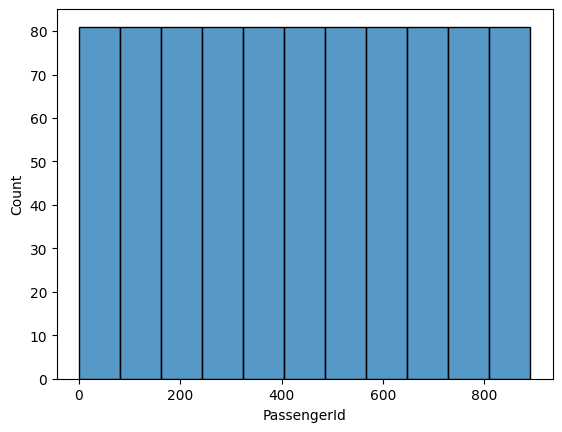

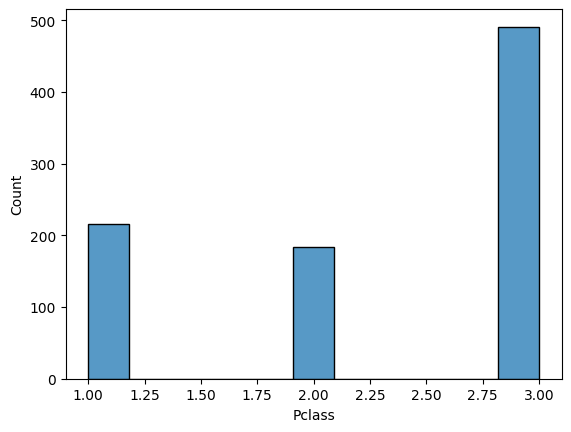

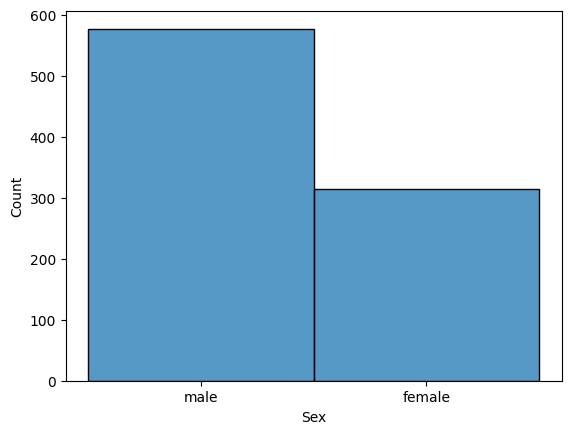

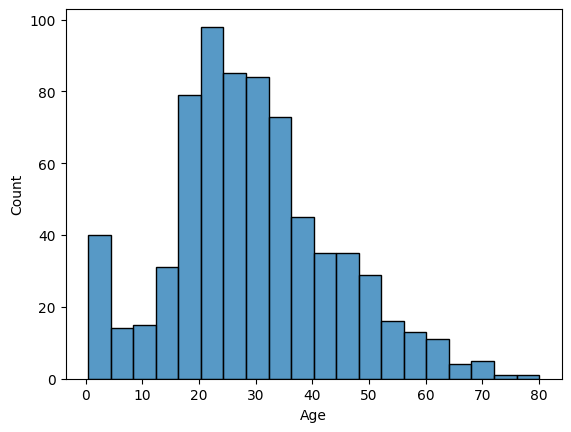

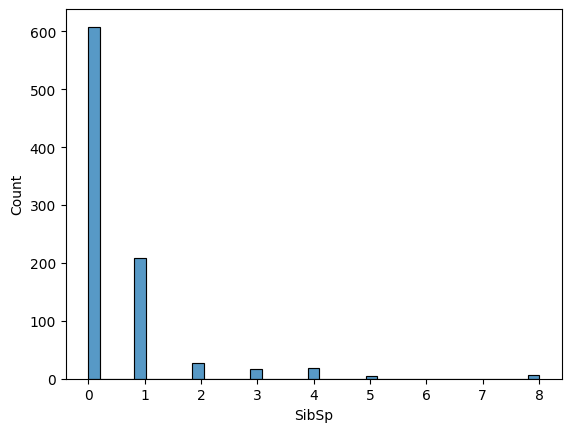

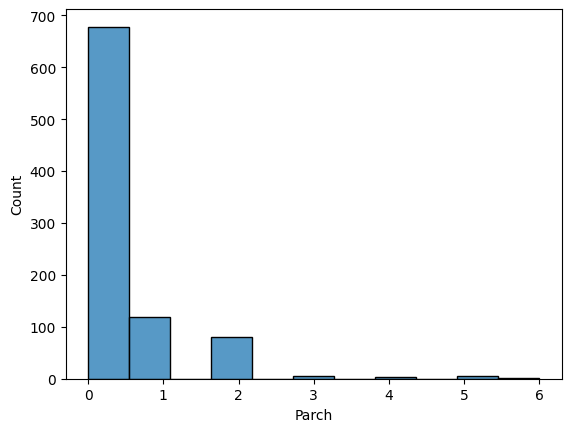

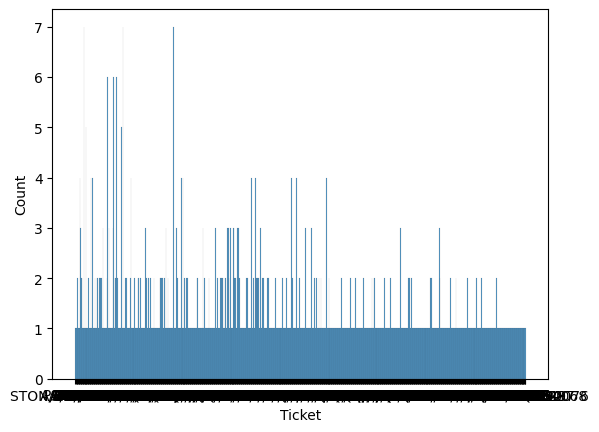

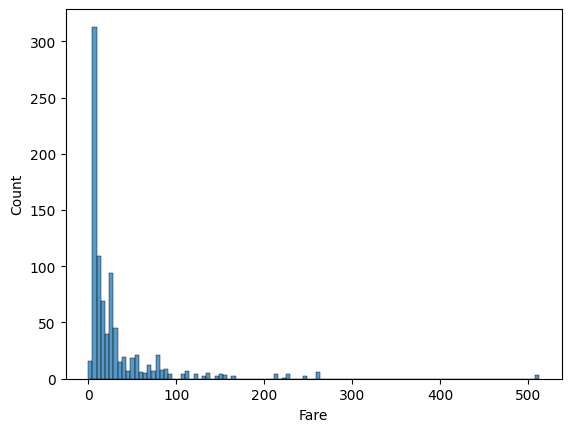

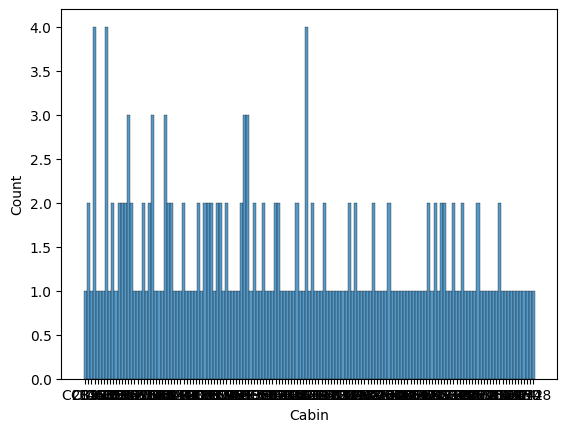

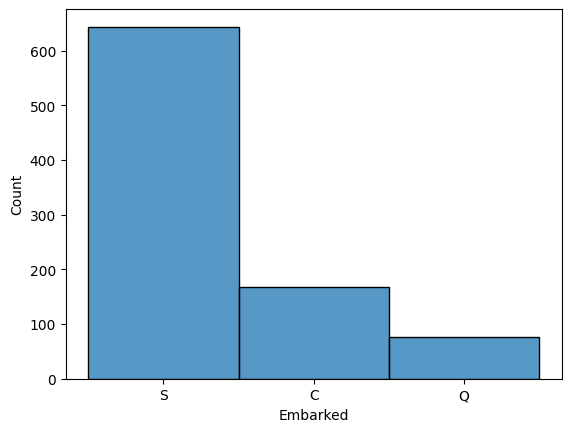

In [40]:
for column in data_train.columns[:-1]:
    sns.histplot(data=data_train, x=column)
    plt.show()

In [41]:
data_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

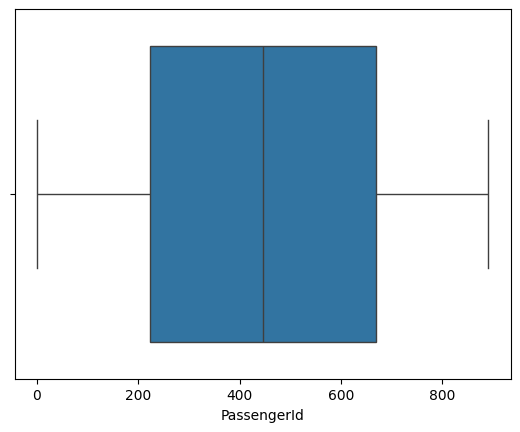

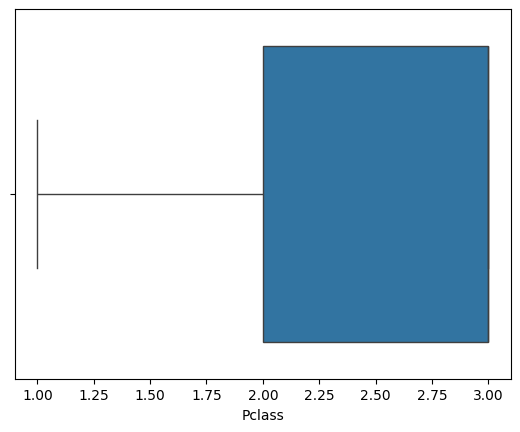

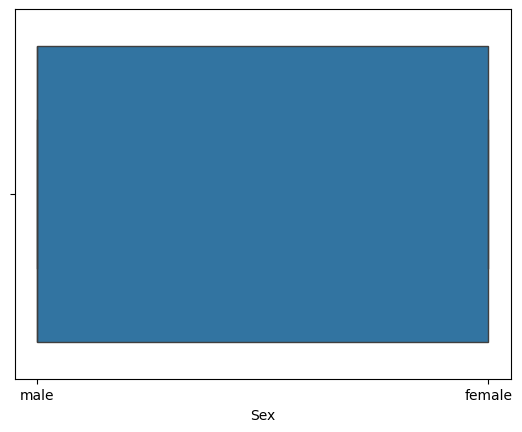

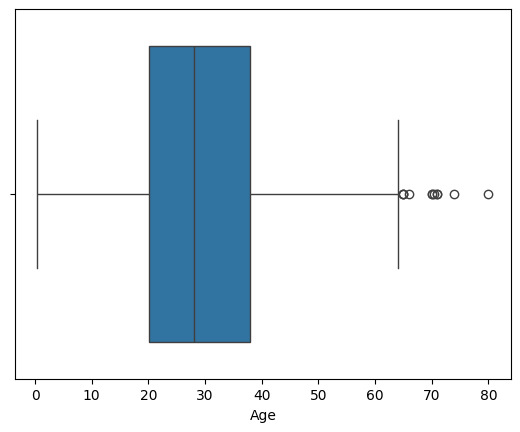

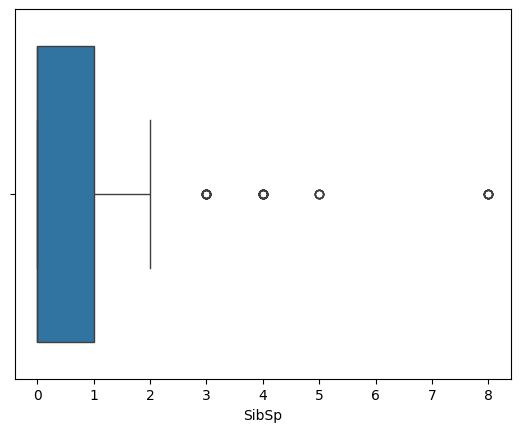

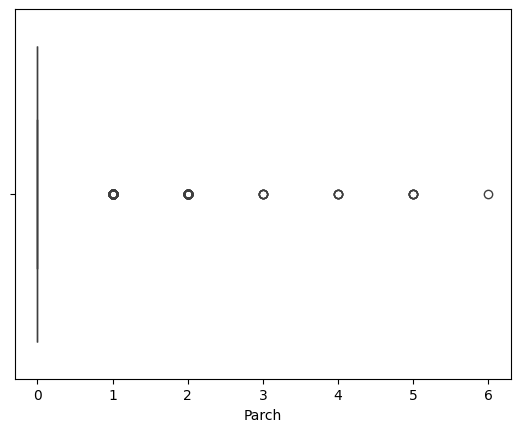

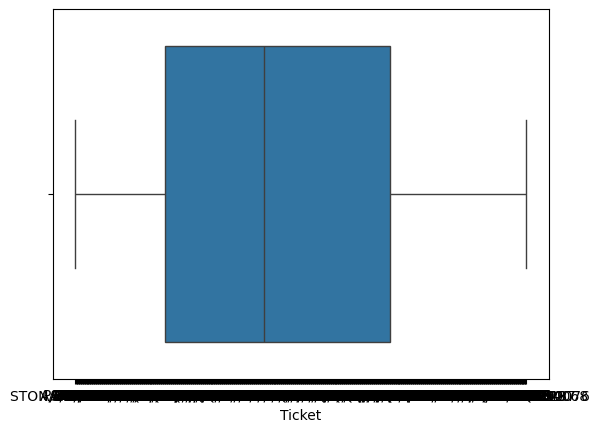

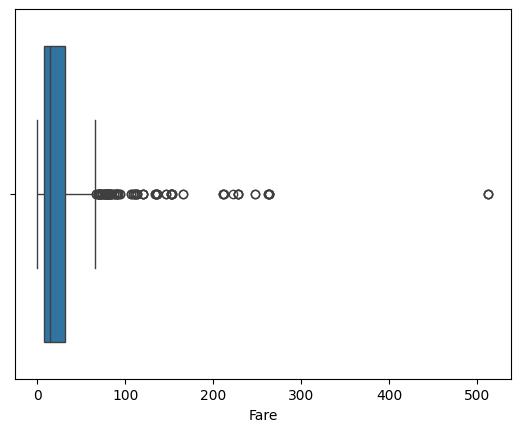

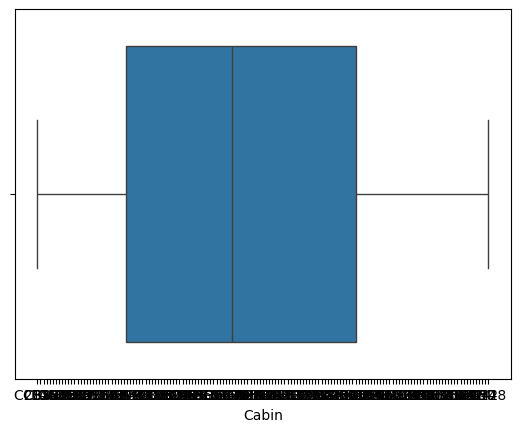

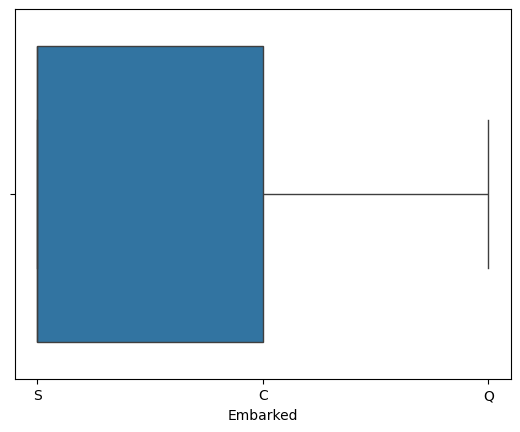

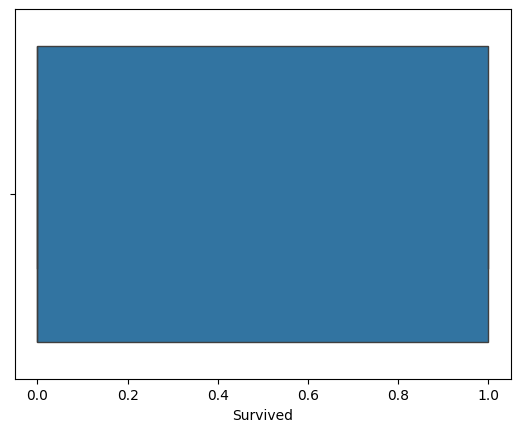

In [42]:
for column in data_train.columns:
    sns.boxplot(data=data_train, x=column)
    plt.show()

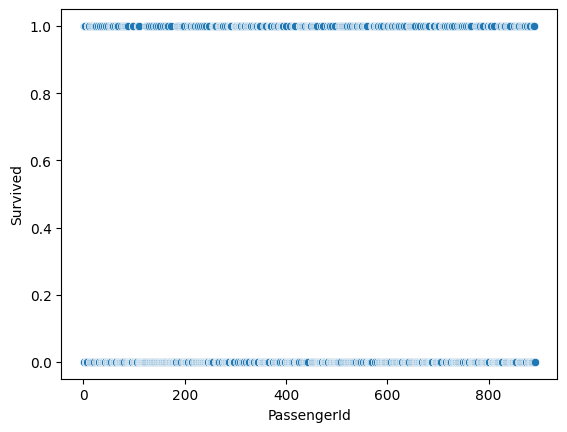

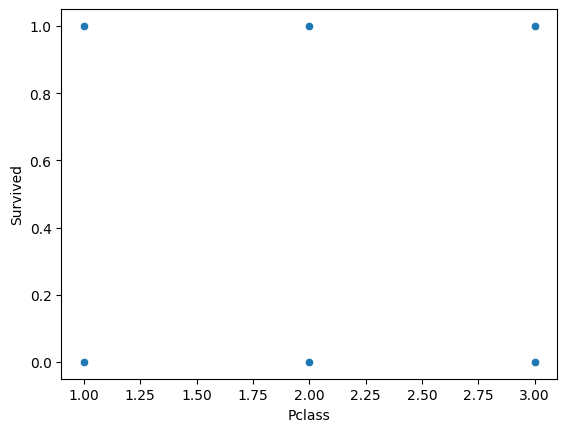

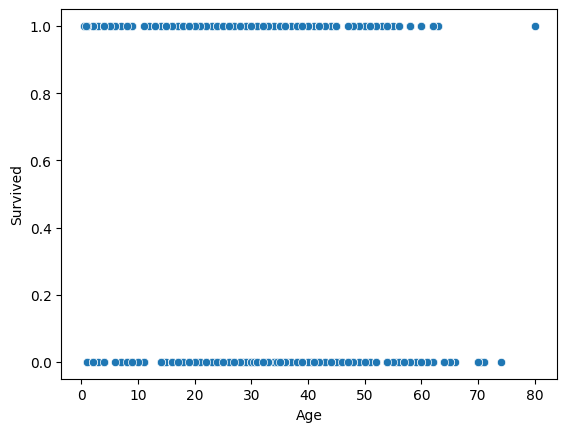

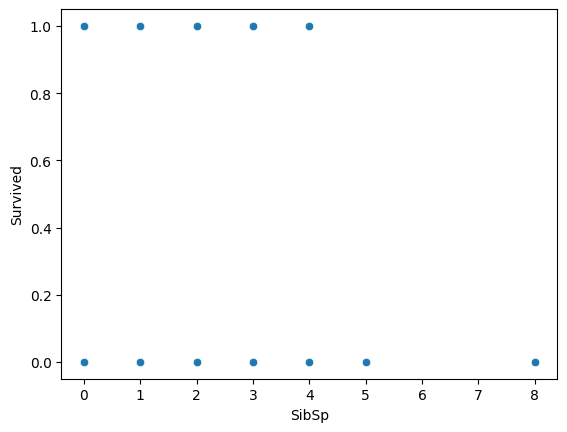

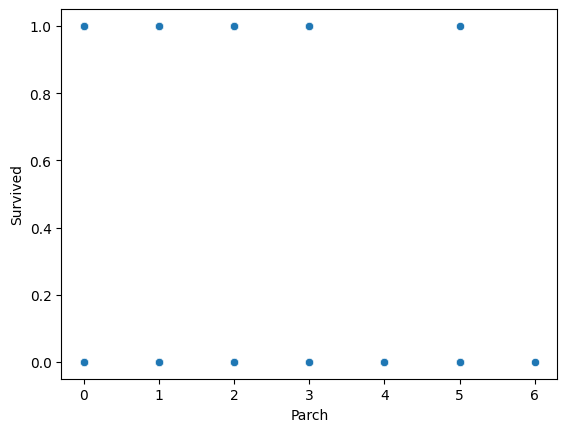

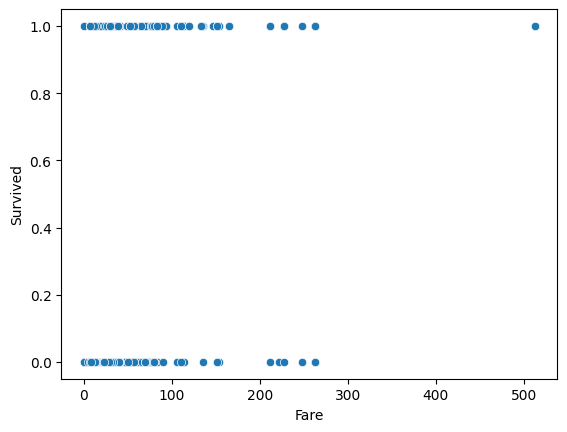

In [43]:
for column in data_train.columns[:-1]:
    if (data_train[column].dtype != "object"):
        sns.scatterplot(data=data_train, x=column, y="Survived")
        plt.show()

In [44]:
for column in data_train.columns[:-1]:
    if (data_train[column].dtype != "object"):
        print (f"Column {column}, Skewness: {data_train[column].skew()}, Kurtosis: {data_train[column].kurt()}")

Column PassengerId, Skewness: 0.0, Kurtosis: -1.1999999999999997
Column Pclass, Skewness: -0.6305479068752845, Kurtosis: -1.2800149715782825
Column Age, Skewness: 0.38910778230082704, Kurtosis: 0.17827415364210353
Column SibSp, Skewness: 3.6953517271630565, Kurtosis: 17.880419726645968
Column Parch, Skewness: 2.7491170471010933, Kurtosis: 9.778125179021648
Column Fare, Skewness: 4.787316519674893, Kurtosis: 33.39814088089868


# Data Preprocessing

In [45]:
data_train.isna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [46]:
data_train.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [47]:
missing_value_percentage = data_train.isna().sum() / len(data_train) * 100
print (missing_value_percentage)

PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Survived        0.000000
dtype: float64


In [48]:
for key, value in missing_value_percentage.items():
    if (value > 50):
        data_train = data_train.drop(columns=key, axis=1)

In [49]:
data_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,female,35.0,1,0,113803,53.1000,S,1
4,5,3,male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,S,0
887,888,1,female,19.0,0,0,112053,30.0000,S,1
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,S,0
889,890,1,male,26.0,0,0,111369,30.0000,C,1


In [50]:
data_train = data_train.drop(columns="Ticket")

In [51]:
data_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,0
887,888,1,female,19.0,0,0,30.0000,S,1
888,889,3,female,NaN,1,2,23.4500,S,0
889,890,1,male,26.0,0,0,30.0000,C,1


In [52]:
data_train.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [53]:
for column in data_train.columns:
    if (data_train[column].isna().any()):
        if (data_train[column].dtype == "object"):
            data_train[column] = data_train[column].fillna(data_train[column].mode()[0])
        else:
            data_train[column] = data_train[column].fillna(data_train[column].median())

In [54]:
data_train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [55]:
data_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,0
887,888,1,female,19.0,0,0,30.0000,S,1
888,889,3,female,28.0,1,2,23.4500,S,0
889,890,1,male,26.0,0,0,30.0000,C,1


# Modelling

In [56]:
data_train.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Survived         int64
dtype: object

In [57]:
encoder = LabelEncoder()
encoded = {}

for column in data_train.columns:
    if (data_train[column].dtype == "object"):
        data_train[column] = encoder.fit_transform(data_train[column])
        encoded[column] = {i:class_name for i, class_name in enumerate(encoder.classes_)}

In [58]:
print (encoded)

{'Sex': {0: 'female', 1: 'male'}, 'Embarked': {0: 'C', 1: 'Q', 2: 'S'}}


In [59]:
for key, value in encoded.items():
    print (f"Key: {key} => Value {value}")

Key: Sex => Value {0: 'female', 1: 'male'}
Key: Embarked => Value {0: 'C', 1: 'Q', 2: 'S'}


In [60]:
data_train.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
Survived         int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

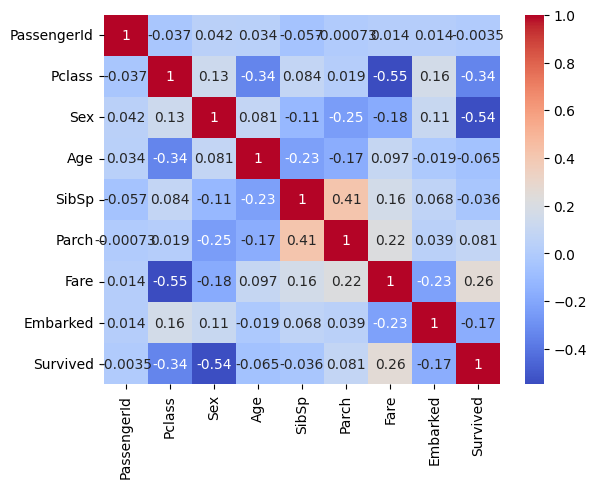

In [61]:
sns.heatmap(data_train[:-1].corr(), annot=True, cmap='coolwarm')
plt.show

In [62]:
x = data_train[data_train.columns[:-1]]
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2
887,888,1,0,19.0,0,0,30.0000,2
888,889,3,0,28.0,1,2,23.4500,2
889,890,1,1,26.0,0,0,30.0000,0


In [63]:
y = data_train[data_train.columns[-1]]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [65]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
276,277,3,0,45.0,0,0,7.7500,2
327,328,2,0,36.0,0,0,13.0000,2
801,802,2,0,31.0,1,1,26.2500,2
256,257,1,0,28.0,0,0,79.2000,0
106,107,3,0,21.0,0,0,7.6500,2
...,...,...,...,...,...,...,...,...
656,657,3,1,28.0,0,0,7.8958,2
476,477,2,1,34.0,1,0,21.0000,2
67,68,3,1,19.0,0,0,8.1583,2
661,662,3,1,40.0,0,0,7.2250,0


In [66]:
y_train

276    0
327    1
801    1
256    1
106    1
      ..
656    0
476    0
67     0
661    0
295    0
Name: Survived, Length: 712, dtype: int64

In [67]:
model = LinearRegression()
model2 = LogisticRegression()
model.fit(X=x_train, y=y_train)
model2.fit(X=x_train, y=y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = model.predict(x_test)
y_pred2 = model2.predict(x_test)

# Evaluation

In [69]:
y_test

154    0
173    0
723    0
538    0
264    0
      ..
21     1
184    1
197    0
171    0
396    0
Name: Survived, Length: 179, dtype: int64

In [70]:
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [76]:
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [72]:
mse = mean_squared_error(y_pred2, y_test)
a = accuracy_score(y_pred2, y_test)
p = precision_score(y_pred2, y_test)
r = recall_score(y_pred2, y_test)
roc = roc_auc_score(y_pred2, y_test)

print (f"MSE: {mse}")
print (f"Accuracy: {a}")
print (f"Precission: {p}")
print (f"Recall: {r}")
print (f"ROC AUC Score: {roc}")


MSE: 0.24581005586592178
Accuracy: 0.7541899441340782
Precission: 0.6323529411764706
Recall: 0.6935483870967742
ROC AUC Score: 0.7399365867107802


In [73]:
mse = mean_squared_error(y_pred, y_test)
a = root_mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)
print (f"MSE: {mse}")
print (f"RMSE: {a}")
print (f"R2 Score: {r2}")

MSE: 0.15302508214625743
RMSE: 0.39118420487828676
R2 Score: -0.465294708511367
